In [81]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.arima_model import ARIMA, ARMAResults
import datetime
import sys
import seaborn as sns
import statsmodels
import statsmodels.stats.diagnostic as diag
from statsmodels.tsa.stattools import adfuller
from math import sqrt
import matplotlib.pyplot as plt
import seaborn as sns
from math import sqrt
from scipy.cluster.vq import kmeans,vq
from numpy import vstack,array
import datetime as dt

In [5]:
df=pd.read_csv('data_stocks.csv')

In [3]:
from matplotlib.pyplot import acorr
plt.style.use('fivethirtyeight')
%matplotlib inline

In [6]:
df

,DATE,SP500,NASDAQ.AAL,NASDAQ.AAPL,NASDAQ.ADBE,NASDAQ.ADI,NASDAQ.ADP,NASDAQ.ADSK,NASDAQ.AKAM,NASDAQ.ALXN,...,NYSE.WYN,NYSE.XEC,NYSE.XEL,NYSE.XL,NYSE.XOM,NYSE.XRX,NYSE.XYL,NYSE.YUM,NYSE.ZBH,NYSE.ZTS
0,1491226200,2363.6101,42.3300,143.6800,129.6300,82.0400,102.2300,85.2200,59.7600,121.5200,...,84.3700,119.0350,44.400,39.8800,82.0300,7.3600,50.2200,63.8600,122.0000,53.3500
1,1491226260,2364.1001,42.3600,143.7000,130.3200,82.0800,102.1400,85.6500,59.8400,121.4800,...,84.3700,119.0350,44.110,39.8800,82.0300,7.3800,50.2200,63.7400,121.7700,53.3500
2,1491226320,2362.6799,42.3100,143.6901,130.2250,82.0300,102.2125,85.5100,59.7950,121.9300,...,84.5850,119.2600,44.090,39.9800,82.0200,7.3600,50.1200,63.7500,121.7000,53.3650
3,1491226380,2364.3101,42.3700,143.6400,130.0729,82.0000,102.1400,85.4872,59.6200,121.4400,...,84.4600,119.2600,44.250,39.9900,82.0200,7.3500,50.1600,63.8800,121.7000,53.3800
4,1491226440,2364.8501,42.5378,143.6600,129.8800,82.0350,102.0600,85.7001,59.6200,121.6000,...,84.4700,119.6100,44.110,39.9600,82.0300,7.3600,50.2000,63.9100,121.6950,53.2400
5,1491226500,2365.6201,42.5399,143.7800,130.0700,82.0400,102.0400,85.9200,59.6100,121.7000,...,84.4825,119.5800,44.150,39.9600,82.0300,7.3600,50.2000,63.8400,121.8500,53.2200
6,1491226560,2365.2000,42.4700,143.8640,130.1800,82.1200,102.3300,85.9120,59.5400,121.6300,...,84.5000,119.3200,44.200,39.9800,82.0566,7.3650,50.3300,63.8300,122.1000,53.3300
7,1491226620,2365.2900,42.4700,143.8100,130.1400,82.1900,102.3700,85.8200,59.4100,121.6100,...,84.5200,119.1100,44.120,39.9500,82.0000,7.3600,50.3000,63.8300,122.2800,53.3700
8,1491226680,2364.3201,42.3900,143.8150,130.1000,82.2300,102.3800,85.8800,59.4300,121.7150,...,84.4800,119.3100,44.120,39.9300,81.9500,7.3700,50.2500,63.8500,121.8750,53.3300
9,1491226740,2364.6399,42.3300,143.8000,130.2100,82.1650,102.3300,85.8600,59.2600,121.8500,...,84.4000,119.1500,44.170,39.8600,81.9000,7.3650,50.2200,63.8400,121.9300,53.4000


In [ ]:
# Pick up the following stocks and generate forecasts accordingly
#Stocks:
#1. NASDAQ.AAPL
#2. NASDAQ.ADP
#3. NASDAQ.CBOE
#4. NASDAQ.CSCO
#5. NASDAQ.EBAY

In [9]:
df.columns.values

array(['DATE', 'SP500', 'NASDAQ.AAL', 'NASDAQ.AAPL', 'NASDAQ.ADBE',
       'NASDAQ.ADI', 'NASDAQ.ADP', 'NASDAQ.ADSK', 'NASDAQ.AKAM',
       'NASDAQ.ALXN', 'NASDAQ.AMAT', 'NASDAQ.AMD', 'NASDAQ.AMGN',
       'NASDAQ.AMZN', 'NASDAQ.ATVI', 'NASDAQ.AVGO', 'NASDAQ.BBBY',
       'NASDAQ.BIIB', 'NASDAQ.CA', 'NASDAQ.CBOE', 'NASDAQ.CELG',
       'NASDAQ.CERN', 'NASDAQ.CHRW', 'NASDAQ.CHTR', 'NASDAQ.CINF',
       'NASDAQ.CMCSA', 'NASDAQ.CME', 'NASDAQ.COST', 'NASDAQ.CSCO',
       'NASDAQ.CSX', 'NASDAQ.CTAS', 'NASDAQ.CTSH', 'NASDAQ.CTXS',
       'NASDAQ.DISCA', 'NASDAQ.DISCK', 'NASDAQ.DISH', 'NASDAQ.DLTR',
       'NASDAQ.EA', 'NASDAQ.EBAY', 'NASDAQ.EQIX', 'NASDAQ.ESRX',
       'NASDAQ.ETFC', 'NASDAQ.EXPD', 'NASDAQ.EXPE', 'NASDAQ.FAST',
       'NASDAQ.FB', 'NASDAQ.FFIV', 'NASDAQ.FISV', 'NASDAQ.FITB',
       'NASDAQ.FLIR', 'NASDAQ.FOX', 'NASDAQ.FOXA', 'NASDAQ.GILD',
       'NASDAQ.GOOG', 'NASDAQ.GOOGL', 'NASDAQ.GRMN', 'NASDAQ.GT',
       'NASDAQ.HAS', 'NASDAQ.HBAN', 'NASDAQ.HOLX', 'NASDAQ.HSIC',
     

In [10]:
# Data Preprocessing

In [11]:
df.isnull().sum()

DATE            0
SP500           0
NASDAQ.AAL      0
NASDAQ.AAPL     0
NASDAQ.ADBE     0
NASDAQ.ADI      0
NASDAQ.ADP      0
NASDAQ.ADSK     0
NASDAQ.AKAM     0
NASDAQ.ALXN     0
NASDAQ.AMAT     0
NASDAQ.AMD      0
NASDAQ.AMGN     0
NASDAQ.AMZN     0
NASDAQ.ATVI     0
NASDAQ.AVGO     0
NASDAQ.BBBY     0
NASDAQ.BIIB     0
NASDAQ.CA       0
NASDAQ.CBOE     0
NASDAQ.CELG     0
NASDAQ.CERN     0
NASDAQ.CHRW     0
NASDAQ.CHTR     0
NASDAQ.CINF     0
NASDAQ.CMCSA    0
NASDAQ.CME      0
NASDAQ.COST     0
NASDAQ.CSCO     0
NASDAQ.CSX      0
               ..
NYSE.USB        0
NYSE.UTX        0
NYSE.V          0
NYSE.VAR        0
NYSE.VFC        0
NYSE.VLO        0
NYSE.VMC        0
NYSE.VNO        0
NYSE.VTR        0
NYSE.VZ         0
NYSE.WAT        0
NYSE.WEC        0
NYSE.WFC        0
NYSE.WHR        0
NYSE.WM         0
NYSE.WMB        0
NYSE.WMT        0
NYSE.WRK        0
NYSE.WU         0
NYSE.WY         0
NYSE.WYN        0
NYSE.XEC        0
NYSE.XEL        0
NYSE.XL         0
NYSE.XOM  

In [19]:
df.isna().sum()

DATE            0
SP500           0
NASDAQ.AAL      0
NASDAQ.AAPL     0
NASDAQ.ADBE     0
NASDAQ.ADI      0
NASDAQ.ADP      0
NASDAQ.ADSK     0
NASDAQ.AKAM     0
NASDAQ.ALXN     0
NASDAQ.AMAT     0
NASDAQ.AMD      0
NASDAQ.AMGN     0
NASDAQ.AMZN     0
NASDAQ.ATVI     0
NASDAQ.AVGO     0
NASDAQ.BBBY     0
NASDAQ.BIIB     0
NASDAQ.CA       0
NASDAQ.CBOE     0
NASDAQ.CELG     0
NASDAQ.CERN     0
NASDAQ.CHRW     0
NASDAQ.CHTR     0
NASDAQ.CINF     0
NASDAQ.CMCSA    0
NASDAQ.CME      0
NASDAQ.COST     0
NASDAQ.CSCO     0
NASDAQ.CSX      0
               ..
NYSE.USB        0
NYSE.UTX        0
NYSE.V          0
NYSE.VAR        0
NYSE.VFC        0
NYSE.VLO        0
NYSE.VMC        0
NYSE.VNO        0
NYSE.VTR        0
NYSE.VZ         0
NYSE.WAT        0
NYSE.WEC        0
NYSE.WFC        0
NYSE.WHR        0
NYSE.WM         0
NYSE.WMB        0
NYSE.WMT        0
NYSE.WRK        0
NYSE.WU         0
NYSE.WY         0
NYSE.WYN        0
NYSE.XEC        0
NYSE.XEL        0
NYSE.XL         0
NYSE.XOM  

In [94]:
df.reset_index(drop=True,inplace=True)

In [123]:
df1=df[['NASDAQ.AAPL','NASDAQ.ADP','NASDAQ.CBOE','NASDAQ.CSCO','NASDAQ.EBAY']]

In [124]:
df1.reset_index(drop=True,inplace=True)

In [125]:
date_df = pd.DataFrame()
date_df['date'] = df.iloc[:,0].apply(lambda x:  dt.datetime.fromtimestamp(x).strftime('%Y-%m-%d'))
date_df['time'] = df.iloc[:,0].apply(lambda x:  dt.datetime.fromtimestamp(x).strftime('%X'))
date_df.head()

,date,time
0,2017-04-03,19:00:00
1,2017-04-03,19:01:00
2,2017-04-03,19:02:00
3,2017-04-03,19:03:00
4,2017-04-03,19:04:00


In [126]:
date_df.reset_index(drop=True,inplace=True)

In [131]:
new_df=pd.concat([date_df,df1], axis=1).reindex(df1.index)

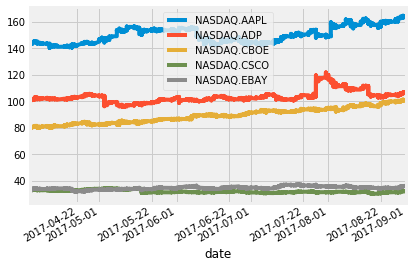

In [136]:
new_df.plot()
plt.show()

In [ ]:
# Stationary test
# data does not have any upward or downward trend or seasonal effects from the above plot. It is consistent

In [138]:
import statsmodels
import statsmodels.api as sm
from statsmodels.tsa.stattools import coint, adfuller

In [140]:
idx = pd.date_range('2017-04-03', periods=5, freq='H')

In [141]:
ts = pd.Series(range(len(idx)), index=idx)

In [142]:
ts

2017-04-03 00:00:00    0
2017-04-03 01:00:00    1
2017-04-03 02:00:00    2
2017-04-03 03:00:00    3
2017-04-03 04:00:00    4
Freq: H, dtype: int64

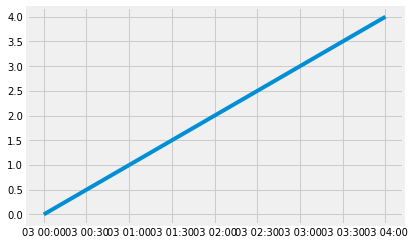

In [228]:
plt.plot(ts)

In [182]:
ts_log = np.log(ts)

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.


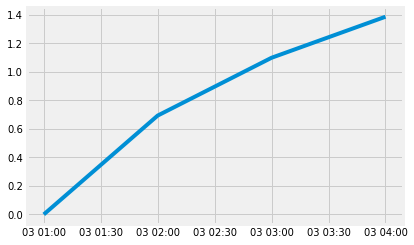

In [183]:
plt.plot(ts_log) # Coverting to log

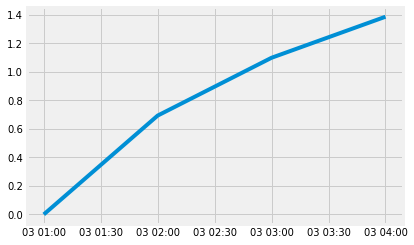

In [190]:
moving_avg = ts_log.rolling(12).mean()
plt.plot(ts_log)
plt.plot(moving_avg, color='red')

In [179]:
from statsmodels.tsa.stattools import acf, pacf

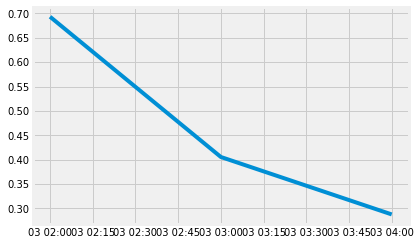

In [191]:
ts_log_diff = ts_log - ts_log.shift()
plt.plot(ts_log_diff)

In [205]:
ts_log_diff.fillna(1,inplace=True)

In [211]:
ts_log_diff.replace([np.inf, -np.inf], np.nan,inplace=True)

In [214]:
ts_log_diff.fillna(1,inplace=True)

In [226]:
lag_acf = acf(ts_log_diff,nlags=10)
lag_pacf = pacf(ts_log_diff,nlags=10)

Text(0.5, 1.0, 'Autocorrelation Function')

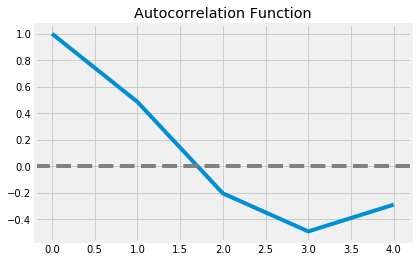

In [227]:
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.title('Autocorrelation Function')

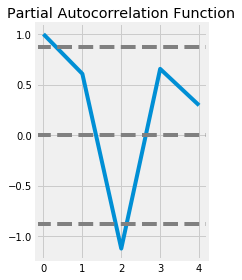

In [218]:
#Plot PACF:
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()

In [223]:
model = ARIMA(ts_log, order=(0.9, 1.4, 0))  
results_AR = model.fit(disp=-1)  
plt.plot(ts_log_diff)
plt.plot(results_AR.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_AR.fittedvalues-ts_log_diff)**2))

TypeError: slice indices must be integers or None or have an __index__ method